In [1]:
import os
import Read_JSON
import numpy as np
import Run_Sims
import Read_Result
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.problem import Problem
from concurrent.futures import ProcessPoolExecutor
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.termination import get_termination
from pymoo.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib
import My_Problem


[-0.002, -0.002, 0.002, 0.002, 1, 1, 1, 1, -20, -50, 0.35, -0.5, 0.1]
[-0.001, -0.001, 0.01, 0.01, 10, 10, 10, 10, 20, 50, 0.4, 0.35, 0.5]
y1 =  1.0745E+02
y2 =  1.0253E+00
y1 =  8.3704E+01
y2 =  1.2078E+00
y1 =  7.0038E+01
y2 =  1.5319E+00
y1 =  3.2490E+01
y2 =  1.8133E+00
y1 =  3.8291E+02
y2 =  1.8070E+00
y1 =  1.9410E+02
y2 =  1.8765E+00
[('3.2490E+01', '1.8133E+00'), ('3.8291E+02', '1.8070E+00'), ('8.3704E+01', '1.2078E+00'), ('1.9410E+02', '1.8765E+00'), ('7.0038E+01', '1.5319E+00'), ('1.0745E+02', '1.0253E+00')]
out =  {'F': [array(['3.2490E+01', '3.8291E+02', '8.3704E+01', '1.9410E+02',
       '7.0038E+01', '1.0745E+02'], dtype='<U10'), array(['1.8133E+00', '1.8070E+00', '1.2078E+00', '1.8765E+00',
       '1.5319E+00', '1.0253E+00'], dtype='<U10')], 'G': None, 'H': None}
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |        6 |      4 |             - |             -
y1 = y1 =   1.1565E+021.0841E+02

y2 = y2 =   1.0447E+001.0090E+00

y1 =  1.2041E+02
y2 =  1.

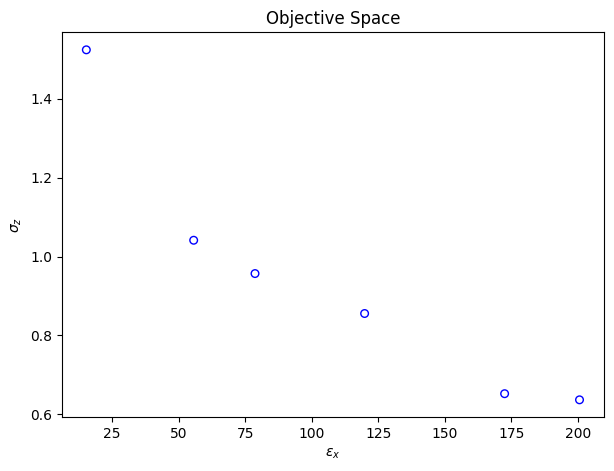

In [2]:
home = os.getcwd()
work_dir = home+'/5nC_1.5Cell'
os.chdir(work_dir)

fn_opt_input = os.path.join(work_dir,'Opt_input.json')
xl,xu,opt_input = My_Problem.Gen_Para_Space(fn_opt_input)
print(xl)
print(xu)

y = np.zeros(2)
#Gen_Inputs_files(x, work_dir,opt_input)
problem = My_Problem.MyProblem(work_dir,opt_input,len(xl),len(y),xl,xu)
#MyProblem.evaluate(problem, x, y)
algorithm = NSGA2(
    pop_size=6,
    n_offsprings=6,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)
termination = get_termination("n_gen", 10)
res = minimize(problem,
            algorithm,
            termination,
            seed=1,
            save_history=True,
            verbose=True)

X = res.X
F = res.F
print(X)
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.xlabel("$\epsilon_x$")
plt.ylabel("$\sigma_z$")
# save the figure
plt.savefig("Objective_space.png", dpi=200)

# try to write the X corresponding to the Pareto front to a file
try:
    f = open('X.txt', 'w')
    for i in range(len(X)):
        f.write(str(X[i]) + '\n')
    f.close()
except FileNotFoundError:
    print("File not found.")
except Exception as e:
    print(f"An error occurred: {e}")

# try to write the F corresponding to the Pareto front to a file
try:
    f = open('F.txt', 'w')
    for i in range(len(F)):
        f.write(str(F[i][0]) + ',' + str(F[i][1]) + '\n')
    f.close()
except FileNotFoundError:
    print("File not found.")
except Exception as e:
    print(f"An error occurred: {e}")

os.chdir(home)

In [3]:
from traitlets import All


def locate_subarray(two_d_array, target):
    for i, sub_array in enumerate(two_d_array):
        if np.array_equal(sub_array, target):
            return i  # Return the index of the sub-array
    return -1  # Return -1 if the target is not found
pop = res.pop
All_X = pop.get("X")
All_F = pop.get("F")
# find the index X[0] in All_X
index = locate_subarray(All_X, X[1])
print(index)



1


In [4]:
All_X

array([[-1.78766273e-03, -1.26835201e-03,  6.11828727e-03,
         2.42811476e-03,  2.39913842e+00,  2.11226585e+00,
         6.86238055e+00,  7.08306444e+00, -1.61168598e+01,
         4.24236289e+00,  3.84720008e-01, -1.47145734e-01,
         1.18330173e-01],
       [-1.41144834e-03, -1.73445334e-03,  6.12062669e-03,
         2.46452799e-03,  5.93791796e+00,  9.05876044e+00,
         6.46621561e+00,  8.40477254e+00, -1.47032150e+01,
        -8.59440122e+00,  3.84720008e-01, -1.44254758e-01,
         1.35973776e-01],
       [-1.78766273e-03, -1.26835201e-03,  6.01464140e-03,
         2.42540044e-03,  2.38040876e+00,  4.74287033e+00,
         6.86238055e+00,  7.12916837e+00, -1.61168598e+01,
         4.24236289e+00,  3.84720008e-01, -1.47931767e-01,
         1.18330173e-01],
       [-1.93413109e-03, -1.79346177e-03,  6.01292921e-03,
         2.28471423e-03,  5.38069361e+00,  4.76531479e+00,
         2.33886313e+00,  4.28777257e+00,  6.92403560e+00,
        -1.88289644e+01,  3.84333342e

In [5]:
All_F

array([[ 15.283  ,   1.5242 ],
       [200.64   ,   0.63668],
       [ 55.624  ,   1.0413 ],
       [119.87   ,   0.85555],
       [172.49   ,   0.65224],
       [ 78.679  ,   0.95684]])